In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


minute_aggregated/spam_ahead-1.0s.featureset.csv
Accuracy: 0.7542, Recall: 0.7137, Precision: 0.7542, f1_score: 0.7304 



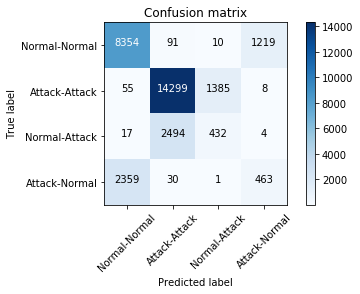

minute_aggregated/ddos_ahead-1.0s.featureset.csv
Accuracy: 0.8778, Recall: 0.8551, Precision: 0.8778, f1_score: 0.8649 



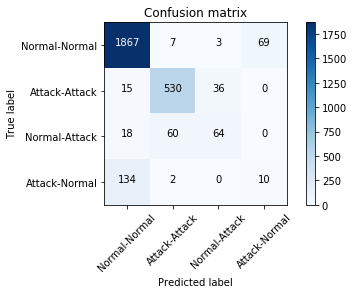

minute_aggregated/irc_ahead-1.0s.featureset.csv
Accuracy: 0.7933, Recall: 0.7564, Precision: 0.7933, f1_score: 0.7723 



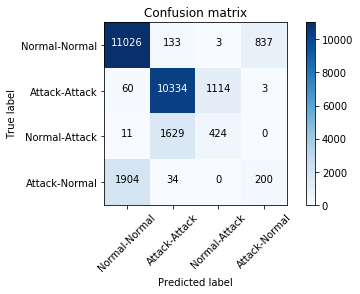

In [7]:
# Detecting window ahead with normal on one second intervals
from botnet_detection import summary_of_detection, rf_train, test_dict, get_specific_features_from, dl_train, dl_test_dict, test_dict, get_ahead_feature_labels
from summarizer import Summarizer
from plot_features import plot_confusion_matrix
import os

attacks = ['spam', 'ddos', 'irc']
files = ['minute_aggregated/{}_ahead-1.0s.featureset.csv'.format(name) for name in attacks]

for f in files:
    print(f)
    xtrain, xtest, ytrain, ytest = get_ahead_feature_labels(f, Summarizer().features)
    clf = rf_train(xtrain, ytrain, use_ahead=True)
    results = test_dict(clf, xtest, ytest, use_ahead=True)
    print('Accuracy: {accuracy:.4f}, Recall: {recall:.4f}, Precision: {precision:.4f}, f1_score: {f1_score:.4f}'.format(**results), '\n')
    plot_confusion_matrix(results['confusion_matrix'], ['Normal-Normal', 'Attack-Attack', 'Normal-Attack', 'Attack-Normal'])